![WhatsApp Image 2024-05-15 at 20.31.22_b8239a61.jpg](<attachment:WhatsApp Image 2024-05-15 at 20.31.22_b8239a61.jpg>)
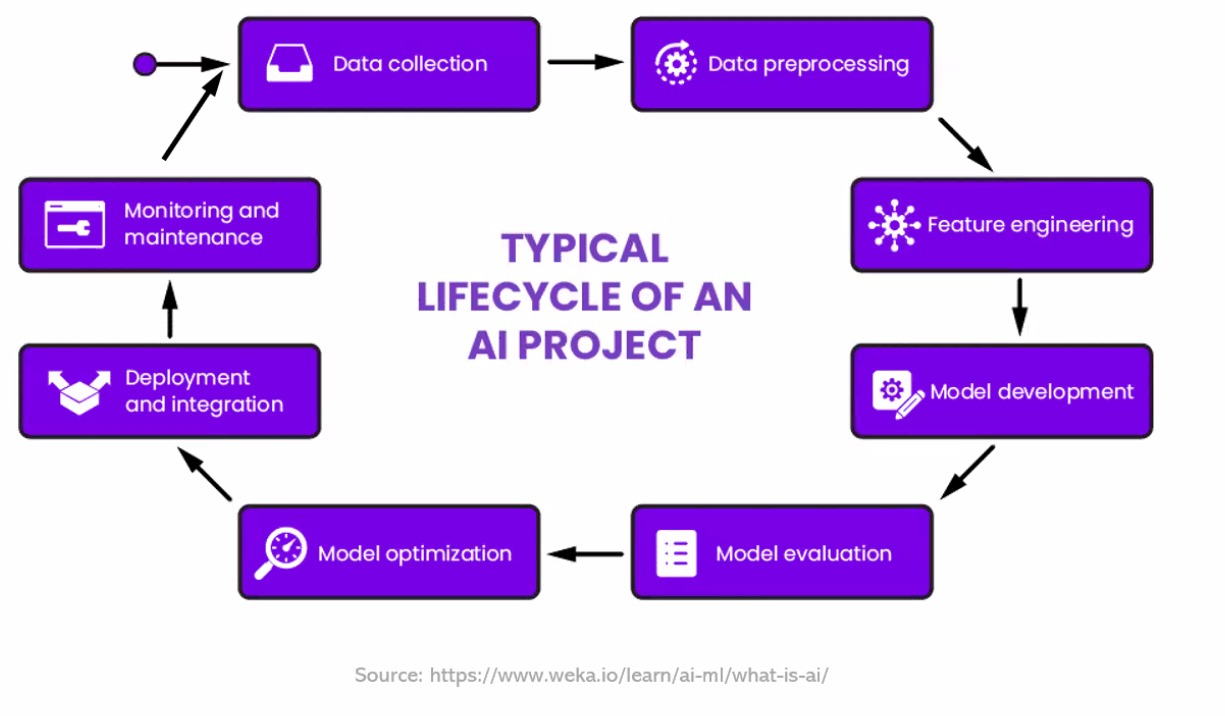

# PPPDM C1 - ANALISIS SENTIMEN ULASAN APLIKASI SATUSEHAT MOBILE DENGAN ALGORITMA MULTINOMIAL NAIVE BAYES DAN SELEKSI FITUR CHI-SQUARE

# Data Preparation dan Labeling data

## Import Data

In [7]:
import pandas as pd

lokasi_file = 'C:/Users/Widnyana/Documents/SMT 4 WALAWE/TUGAS KLP/PPDM/UTS_C1_PPDM/data/data scrap.xlsx'
data = pd.read_excel(lokasi_file)
data.head()


,Submission date,Publication date,Author,Rating,Review,Updated,Likes,Dislikes
0,2023-04-19 18:25:11,2023-04-21 07:06:55,Siti Alqia Tonggiroh,2,Please use another option to verify number tha...,2023-04-21 07:06:55,0,0
1,2023-04-19 16:32:38,2023-04-21 07:06:55,Philbert Frederick,1,"Gk guna, gk bs login ke akun, akun hilang seme...",2023-04-21 07:06:55,1,0
2,2023-04-19 10:37:22,2023-04-21 07:06:55,Roselyn Maria,2,"selalu menghubungkan ulang page, fitur dari pe...",2023-04-21 07:06:55,0,0
3,2023-04-19 07:01:04,2023-04-20 10:09:30,arief pay Susanto,3,"Kode OTP masih belum bisa lewat SMS, harus pak...",2023-04-20 10:09:30,0,0
4,2023-04-19 06:44:05,2023-04-20 10:09:30,Rozi Kin,5,Sangat membantu,2023-04-20 10:09:30,0,0


In [8]:
data.tail()

,Submission date,Publication date,Author,Rating,Review,Updated,Likes,Dislikes
4948,2023-04-01 00:25:35,2023-04-02 10:56:16,Mbak Nurika,1,Sejak aplikasi ini di perbaharui jadiatu sehat...,2023-04-02 10:56:16,0,0
4949,2023-04-01 00:18:36,2023-04-02 10:56:16,Bagus Cahyo Purnomo,1,Sdh tercatat vaksin booster dna sdh bersertifi...,2023-04-02 10:56:16,0,0
4950,2023-04-01 00:13:01,2023-04-02 10:56:16,Laraswati,1,Ini ko saya sudah vaksin booster dari taun kem...,2023-04-02 10:56:16,0,0
4951,2023-04-01 00:08:57,2023-04-02 10:56:16,Citra Wahyuni,5,sangat memuaskan,2023-04-02 10:56:16,0,0
4952,2023-04-01 00:02:12,2023-04-02 10:56:16,Yuliansyah Budi Setiawan,1,Hanya muncul logo apk saja gak bisa login apk,2023-04-02 10:56:16,0,0


In [9]:
# Mengecek kondisi data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4953 entries, 0 to 4952
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Submission date   4953 non-null   datetime64[ns]
 1   Publication date  4953 non-null   datetime64[ns]
 2   Author            4953 non-null   object        
 3   Rating            4953 non-null   int64         
 4   Review            4953 non-null   object        
 5   Updated           4953 non-null   datetime64[ns]
 6   Likes             4953 non-null   int64         
 7   Dislikes          4953 non-null   int64         
dtypes: datetime64[ns](3), int64(3), object(2)
memory usage: 309.7+ KB


In [10]:
# Menghapus kolom yang tidak digunakan
kolom_yang_tidak_digunakan = ['Submission date', 'Rating', 'Publication date', 'Author', 'Updated', 'Likes', 'Dislikes']
data.drop(columns=kolom_yang_tidak_digunakan, inplace=True, errors='ignore')

# Menghapus baris tertentu
baris_yang_dihapus = [4953, 4954]
data.drop(baris_yang_dihapus, axis=0, inplace=True, errors='ignore')

print(data)

                                                 Review
0     Please use another option to verify number tha...
1     Gk guna, gk bs login ke akun, akun hilang seme...
2     selalu menghubungkan ulang page, fitur dari pe...
3     Kode OTP masih belum bisa lewat SMS, harus pak...
4                                       Sangat membantu
...                                                 ...
4948  Sejak aplikasi ini di perbaharui jadiatu sehat...
4949  Sdh tercatat vaksin booster dna sdh bersertifi...
4950  Ini ko saya sudah vaksin booster dari taun kem...
4951                                   sangat memuaskan
4952      Hanya muncul logo apk saja gak bisa login apk

[4953 rows x 1 columns]


In [11]:
# Menyimpan dataset hanya kolom review ke file excel
data.to_excel('MENTAH.xlsx', index=False)

Pelabelan data dilakukan manual

In [12]:
# Import data yang sudah dilabeli

import pandas as pd
lokasi_file = 'C:/Users/Widnyana/Documents/SMT 4 WALAWE/TUGAS KLP/PPDM/UTS_C1_PPDM/preprocessing/data_label.xlsx'
label = pd.read_excel(lokasi_file)
label.head()

,Review,label
0,Please use another option to verify number tha...,0
1,"Gk guna, gk bs login ke akun, akun hilang seme...",0
2,"selalu menghubungkan ulang page, fitur dari pe...",0
3,"Kode OTP masih belum bisa lewat SMS, harus pak...",0
4,Sangat membantu,1


In [13]:
label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4953 entries, 0 to 4952
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  4953 non-null   object
 1   label   4953 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 77.5+ KB


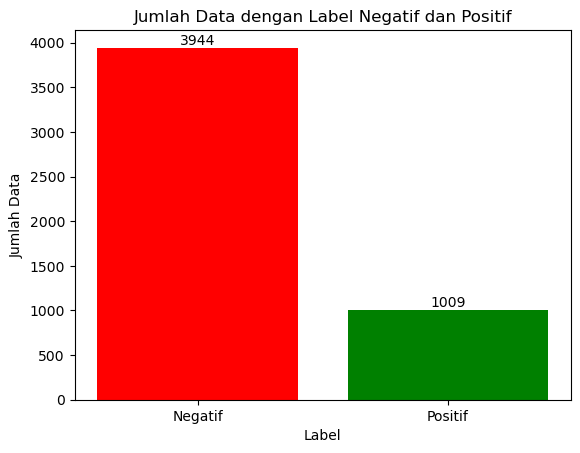

In [14]:
#CEK PERSEBARAN DATA SEBELUM TAHAP PENYEIMBANGAN DATA

import matplotlib.pyplot as plt

# Menghitung jumlah data dengan label 0 (negatif) dan label 1 (positif)
negative_count = (label['label'] == 0).sum()
positive_count = (label['label'] == 1).sum()

# Daftar label dan jumlahnya
labels = ['Negatif', 'Positif']
counts = [negative_count, positive_count]

# Membuat bar plot
plt.bar(labels, counts, color=['red', 'green'])
plt.xlabel('Label')
plt.ylabel('Jumlah Data')
plt.title('Jumlah Data dengan Label Negatif dan Positif')

# Menambahkan angka
for i in range(len(labels)):
    plt.text(i, counts[i], str(counts[i]), ha='center', va='bottom')

plt.show()


In [15]:
# METODE BALANCE DATA - PENGHAPUSAN DATA LABEL NEGATIF SECARA RANDOM

import numpy as np
# Filter baris dengan nilai 0 di kolom 'label'
df_with_zeros = label[label['label'] == 0]

# Tentukan jumlah baris yang akan dihapus secara acak 
num_rows_to_delete = min(len(df_with_zeros), 2933)

# Ambil indeks baris secara acak yang akan dihapus
random_indices = np.random.choice(df_with_zeros.index, num_rows_to_delete, replace=False)

# Hapus baris dengan indeks yang telah dipilih secara acak
label = label.drop(random_indices)

In [16]:
label.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2020 entries, 1 to 4951
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  2020 non-null   object
 1   label   2020 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.3+ KB


# DISTRIBUSI JUMLAH DATA

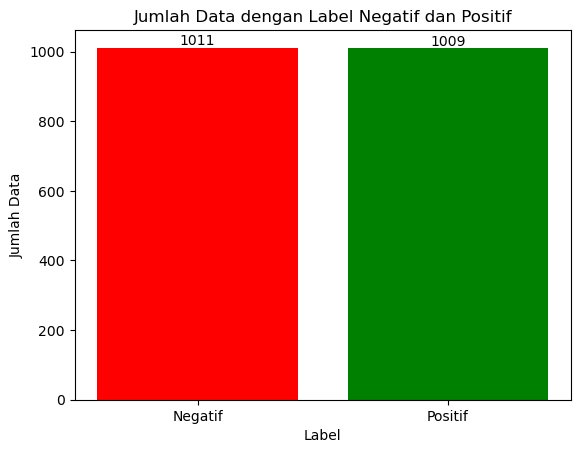

In [17]:
import matplotlib.pyplot as plt

# Menghitung jumlah data dengan label 0 (negatif) dan label 1 (positif)
negative_count = (label['label'] == 0).sum()
positive_count = (label['label'] == 1).sum()

# Daftar label dan jumlahnya
labels = ['Negatif', 'Positif']
counts = [negative_count, positive_count]

# Membuat bar plot
plt.bar(labels, counts, color=['red', 'green'])
plt.xlabel('Label')
plt.ylabel('Jumlah Data')
plt.title('Jumlah Data dengan Label Negatif dan Positif')

# Menambahkan angka
for i in range(len(labels)):
    plt.text(i, counts[i], str(counts[i]), ha='center', va='bottom')

plt.show()


In [18]:
label.to_excel("data_balance.xlsx", index=False)